In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

import xarray as xa

In [2]:
all0205 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [3]:
var = "toa_lw"
alllw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],], 
               dim='time')

In [4]:
var = "toa_sw"
allsw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],], 
               dim='time')

In [5]:
#Gistemp Surface temp by lat, lon and time
#st_global_anom_raghu = xa.open_dataset("../daa/gistemp1200_GHCNv4_ERSSTv5.nc").sel(time=ragutime).tempanomaly
#gmst_anom_raghu = st_global_anom_raghu.mean(["lat", "lon"])
#gmst_anom_raghu 

In [6]:
#0
trop = slice(-30,30)
ragutime = slice('2002-07-15T00:00:00.000000000',\
                 '2020-12-15T00:00:00.000000000' )

In [60]:
RclrLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_clr_mon.mean(["lon"])
RovcLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_cldtyp_mon.mean(["lon"])
lwK_trop = (RclrLW_trop - RovcLW_trop)/100

In [61]:
RclrSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_trop = (RclrSW_trop - RovcSW_trop)/100

In [62]:
#1d
#If I dont mean over lon before, this will have loads of nans
K_trop = lwK_trop + swK_trop
K_trop

<xarray.DataArray (time: 222, lat: 60, opt: 6, press: 7)>
array([[[[-6.95322827e-02,  3.64839882e-02,  8.21122974e-02, ...,
           2.25793272e-01,  2.04872966e-01,  7.49827921e-02],
         [-1.62981927e-01, -6.67938590e-02,  3.76801491e-02, ...,
           3.13377500e-01,  4.12711978e-01,  3.57284546e-01],
         [-3.40756178e-01, -2.39068091e-01, -9.13528800e-02, ...,
           2.37454534e-01,  4.44557786e-01,             nan],
         [-5.62052011e-01, -4.30202931e-01, -2.85203397e-01, ...,
           5.42105436e-02,  2.92046666e-01,             nan],
         [-7.38983631e-01, -5.92498481e-01, -4.67242599e-01, ...,
          -9.60992575e-02,  1.48593426e-01,             nan],
         [-8.96904230e-01, -7.89884746e-01, -6.86066270e-01, ...,
          -2.32035637e-01,  6.15028143e-02,  3.62516999e-01]],

        [[-6.88544065e-02,  4.08401489e-02,  8.98803324e-02, ...,
           2.18167841e-01,  2.13180110e-01,  5.63667268e-02],
         [-1.70478523e-01, -6.60903454e-02,  3.68929505e-02, ...,
           3.18872720e-01,  4.23389077e-01,  1.86389953e-01],
         [-3.47768605e-01, -2.52343833e-01, -1.08421326e-01, ...,
           2.30587900e-01,  4.48855877e-01,             nan],
         [-5.74028909e-01, -4.45169687e-01, -3.01013947e-01, ...,
...
         [-5.49480498e-01, -4.36248958e-01, -3.00791979e-01, ...,
           6.08726740e-02,  2.84405172e-01,             nan],
         [-7.56479204e-01, -6.28482819e-01, -5.21334887e-01, ...,
          -1.25935137e-01,  1.22711658e-01,  3.97061825e-01],
         [-8.56575906e-01, -8.30076456e-01, -7.36992836e-01, ...,
          -3.32523346e-01,  1.20261908e-02,  3.00069809e-01]],

        [[-6.88076392e-02,  4.93827388e-02,  1.28590971e-01, ...,
           2.50883698e-01,  2.62027085e-01,  1.58594668e-01],
         [-1.67061299e-01, -4.12570089e-02,  7.99615383e-02, ...,
           3.14928621e-01,  4.09985334e-01,  3.39138985e-01],
         [-3.51219714e-01, -2.07177818e-01, -7.20238686e-02, ...,
           2.42989719e-01,  4.26641285e-01,             nan],
         [-5.50227284e-01, -4.13185418e-01, -2.83401519e-01, ...,
           6.33349419e-02,  2.95367837e-01,             nan],
         [-7.50771999e-01, -6.28568172e-01, -4.94578242e-01, ...,
          -1.21966183e-01,  1.33485675e-01,  3.80871654e-01],
         [-8.30153108e-01, -8.16523433e-01, -7.18631148e-01, ...,
          -3.01263452e-01,  6.15183115e-02,  2.83497334e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0

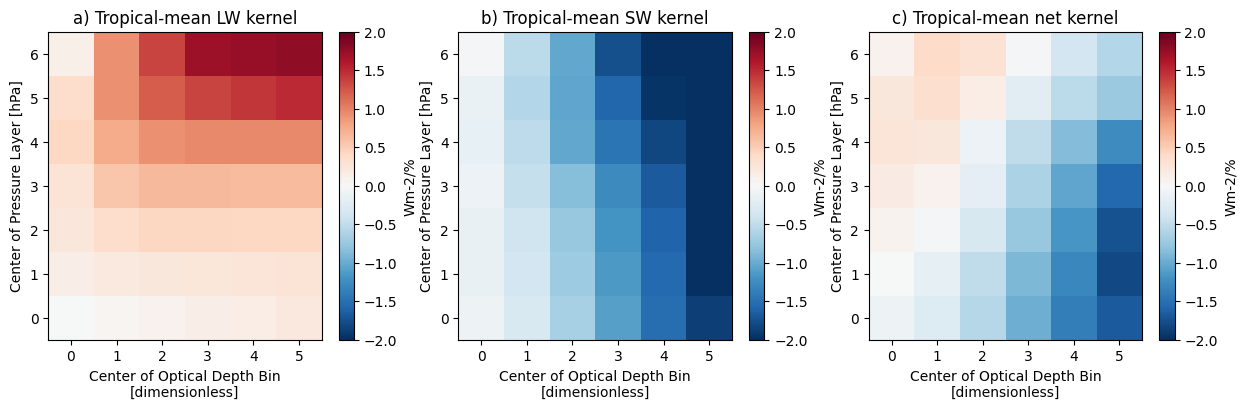

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwK_trop.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW kernel")
swK_trop.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW kernel")
K_trop.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net kernel")
plt.savefig("kernels.png")

In [100]:
#Another way of testing if the kernels values are ok
p = np.array([1000.0 ,  800.0,  680,  560,  440, 310.0,  180,  10])
midpoints = [(p[i] + p[i -1])/2 for i in np.arange(len(p)) ]
midpoints

[505.0, 900.0, 740.0, 620.0, 500.0, 375.0, 245.0, 95.0]

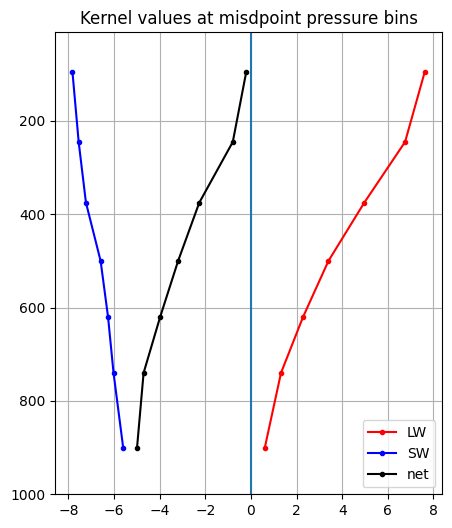

In [101]:
plt.figure(figsize=(5,6))
plt.plot(lwK_trop.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-r", label="LW")
plt.plot(swK_trop.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-b", label="SW")
plt.plot(K_trop.mean(["lat","time"]).sum("opt"), midpoints[1:], ".-k", label="net")
plt.gca().invert_yaxis()
plt.ylim(1000,10)
plt.vlines(0, ymin=1000, ymax=10)
plt.grid()
plt.legend()
plt.title("Kernel values at misdpoint pressure bins")
plt.savefig("kernels_values.png")

In [102]:
#2
area_trop = alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).mean("lon")
cc_trop_anom = area_trop.groupby('time.month')- area_trop.groupby('time.month').mean('time')

In [103]:
#3
#NOtice! If I mean over lon here rather than when calculating the kernels, the feedback values change slightly (further away than raghuraman's)
#IN the seconfnd 
lwR_trop = lwK_trop*cc_trop_anom
swR_trop = swK_trop*cc_trop_anom

In [104]:
#4
lwR_trop_mean = lwR_trop.weighted(weights=weights).mean(["lat"])
swR_trop_mean = swR_trop.weighted(weights=weights).mean(["lat"])

In [105]:
#5
#Gistemp GMST anomalies
gmst = pd.read_csv("../daa/GLB.Ts+dSST.csv", skiprows=[0])

gmst = gmst.loc[ gmst['Year'] >= 2002 ]
gmst = gmst.loc[ gmst['Year'] < 2021 ]
lista_gmst = gmst[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].values.flatten().tolist()
#lista_gmst, len(lista_gmst)
lista_gmst[6:]
#NOT the same as meaqning across all the values, which gives:0.7340974 , 0.23327379, 0.95729756, 0.8614268 , 0.7519227... 
gmst_anom_raghu = np.array(lista_gmst[6:], dtype=np.float16)
gmst_anom_raghu.shape

(222,)

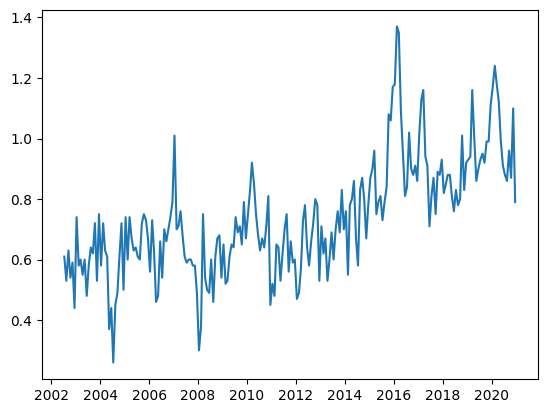

In [106]:
plt.plot(alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).time, gmst_anom_raghu ) #The GMST anomalies 

In [107]:
#6
lw_feed_slope =  np.zeros([7,6])
lw_feed_st =  np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bint = lwR_trop_mean.sel(press=p, opt=od)
        lw_regress = stats.linregress(gmst_anom_raghu, bint)
        lw_feed_slope[p, od] = lw_regress.slope
        lw_feed_st[p, od] = lw_regress.stderr

lwfeed_trops = xa.DataArray(lw_feed_slope,
                    coords={"press": lwR_trop_mean.press, "opt":lwR_trop_mean.opt, 
                           },
                   )

Tropical LW feedback =  -0.520257078697598
High cloud Tropical LW feedback =  -0.3550432210872373
Low-mid cloud Tropical LW feedback =  -0.16521385761036067


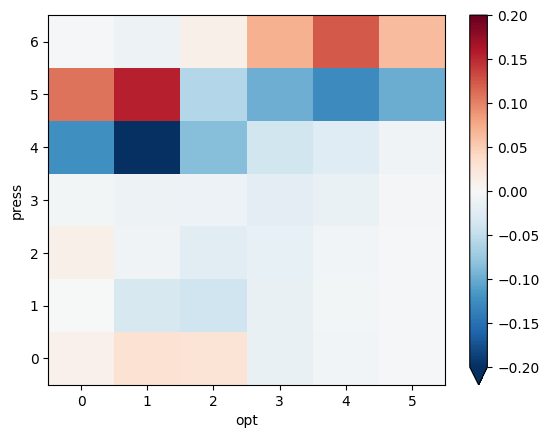

In [108]:
print("Tropical LW feedback = ", lwfeed_trops.sum(["opt", "press"]).data)
print("High cloud Tropical LW feedback = ", lwfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical LW feedback = ", lwfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
lwfeed_trops.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")
#-0.5034, -0.3448, -0.1586

In [109]:
print("Tropical LW feedback sd = ", np.sum( lw_feed_st))
print("High cloud Tropical LW feedback = ", np.sum( lw_feed_st[4:,:]))
print("Low-mid cloud Tropical LW feedback = ", np.sum( lw_feed_st[:4,:]))
#lwfeed_trop.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

Tropical LW feedback sd =  0.4561925421281634
High cloud Tropical LW feedback =  0.33322695686162135
Low-mid cloud Tropical LW feedback =  0.12296558526654208


In [110]:
#6
sw_feed =  np.zeros([7,6])
sw_feed_st = np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = swR_trop_mean.sel(press=p, opt=od)
        sw_regress = stats.linregress(gmst_anom_raghu, bints)
        sw_feed[p, od] = sw_regress.slope
        sw_feed_st[p, od] = sw_regress.stderr

swfeed_trops = xa.DataArray(sw_feed, 
                    coords={"press": swR_trop_mean.press, "opt":swR_trop_mean.opt, 
                           },
                   )

0.7488152858056724
High cloud Tropical SW feedback =  0.4295723386757836
Low-mid cloud Tropical SW feedback =  0.3192429471298888


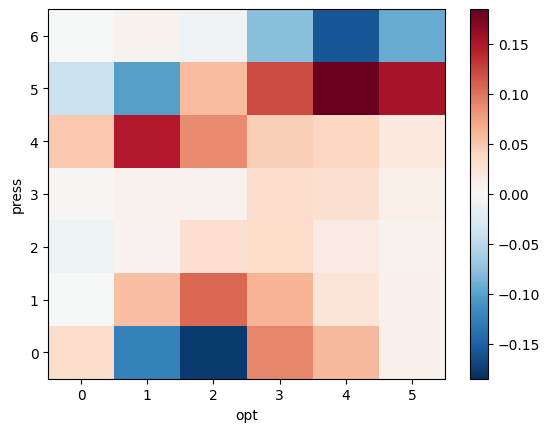

In [111]:
print(swfeed_trops.sum(["press", "opt"]).data) 
print("High cloud Tropical SW feedback = ", swfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical SW feedback = ", swfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(swfeed_trops).plot()
# 0.7710, 0.4199, 0.3511

In [112]:
print("Tropical SW feedback sd = ", np.sum( sw_feed_st))
print("High cloud Tropical SW feedback = ", np.sum( sw_feed_st[4:,:]))
print("Low-mid cloud Tropical SW feedback = ", np.sum( sw_feed_st[:4,:]))

Tropical SW feedback sd =  0.7128390704296722
High cloud Tropical SW feedback =  0.32940067348483537
Low-mid cloud Tropical SW feedback =  0.38343839694483683


In [113]:
weights = np.cos(np.deg2rad(netR_trop.lat))
weights

<xarray.DataArray 'lat' (lat: 60)>
array([0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    [-90.  90.]

In [136]:
#6
netR_trop = K_trop*cc_trop_anom
netR_trop_mean = netR_trop.weighted(weights=weights).mean(["lat"])

net_feed =  np.zeros([7,6])
net_feed_st = np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = netR_trop_mean.sel(press=p, opt=od)
        net_regress = stats.linregress(gmst_anom_raghu, bints)
        net_feed[p, od] = net_regress.slope
        net_feed_st[p, od] = net_regress.stderr

netfeed_tropsr = xa.DataArray(net_feed, 
                    coords={"press": netR_trop_mean.press, "opt":netR_trop_mean.opt, 
                           },
                   )

<xarray.DataArray ()>
array(0.2285606)
High cloud Tropical net feedback =  0.07452911758854623
Low-mid cloud Tropical net feedback =  0.1540290895195282


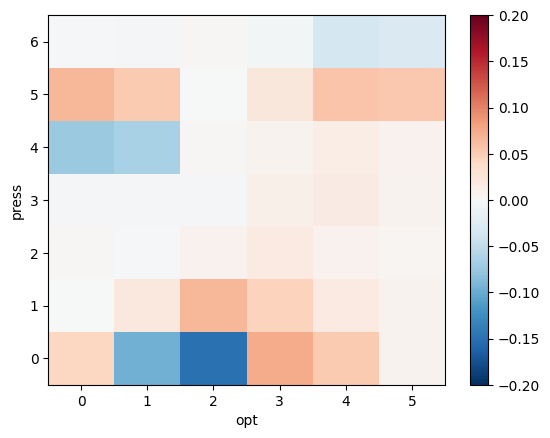

In [137]:
#netfeed_trops = swfeed_trops + lwfeed_trops
print(netfeed_tropsr.sum(["press", "opt"]))
print("High cloud Tropical net feedback = ", netfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical net feedback = ", netfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
netfeed_trops.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

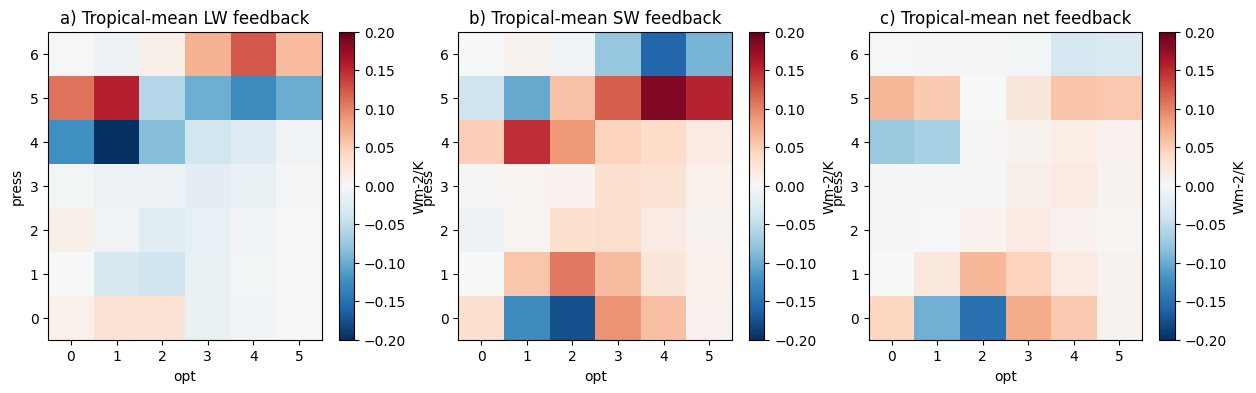

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW feedback")
swfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW feedback")
netfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net feedback")
plt.savefig("feedbacks.png")

In [117]:
#CI
sw_reg = stats.linregress(gmst_anom_raghu, swR_trop_mean.sel(press=1, opt=1))
sw_reg.slope
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(gmst_anom_raghu)-2)
ts*sw_reg.stderr

0.030267016545237703

# ITCZ

In [118]:
itcz= slice(0,20)
ocean_only = slice(120,260)

In [119]:
RclrLW_itcz = alllw.sel(lat=itcz,lon=ocean_only, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_itcz = alllw.sel(lat=itcz,lon=ocean_only, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_itcz = (RclrLW_itcz - RovcLW_itcz)/100

In [120]:
RclrSW_itcz = allsw.sel(lat=itcz,lon=ocean_only,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_itcz = allsw.sel(lat=itcz,lon=ocean_only,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_itcz = (RclrSW_itcz - RovcSW_itcz)/100

In [121]:
K_itcz = swK_itcz + lwK_itcz

Text(0.5, 1.0, 'c) ITCZ-mean net kernel')

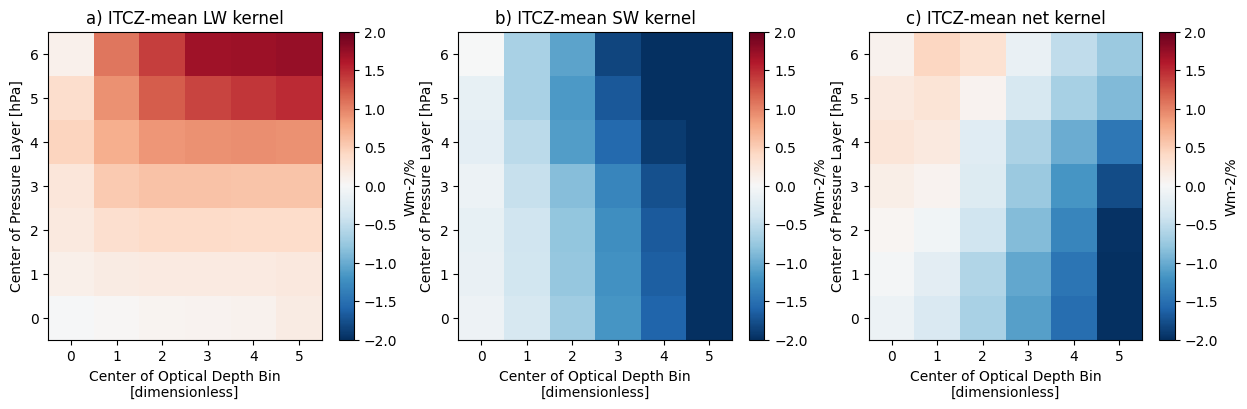

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwK_itcz.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) ITCZ-mean LW kernel")
swK_itcz.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) ITCZ-mean SW kernel")
K_itcz.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) ITCZ-mean net kernel")
#plt.savefig("kernels.png")

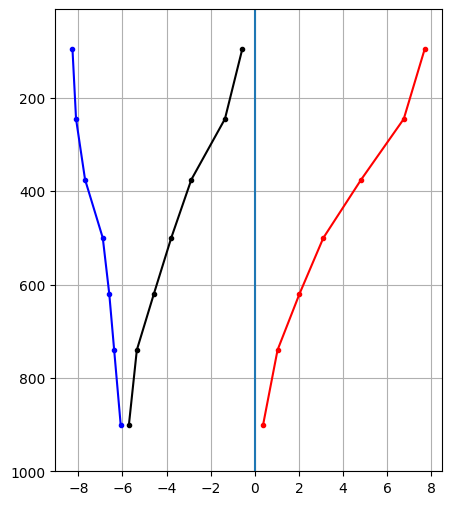

In [138]:
plt.figure(figsize=(5,6))
plt.plot(lwK_itcz.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-r")
plt.plot(swK_itcz.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-b")
plt.plot(K_itcz.mean(["lat","time"]).sum("opt"), midpoints[1:], ".-k")
plt.gca().invert_yaxis()
plt.ylim(1000,10)
plt.vlines(0, ymin=1000, ymax=10)
plt.grid()

IN conclusion, kernels dont change much with area or time

In [124]:
#2
area_itcz = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=ocean_only,time=ragutime).mean("lon")
cc_itcz_anom = area_itcz.groupby('time.month')- area_itcz.groupby('time.month').mean('time')

In [125]:
#3
lwR_itcz = lwK_itcz*cc_itcz_anom
swR_itcz = swK_itcz*cc_itcz_anom

In [139]:
w_itcz = np.cos(np.deg2rad(lwR_itcz.lat))

wR_itcz_mean = lwR_itcz.weighted(weights=w_itcz).mean("lat") 
swR_itcz_mean = swR_itcz.weighted(weights=w_itcz).mean("lat")

In [140]:
lw_feed_itcz =  np.zeros([7,6])
lw_feed_itcz_st =  np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints_itcz = lwR_itcz_mean.sel(press=p, opt=od)
        lw_regress  = stats.linregress(gmst_anom_raghu, bints_itcz)
        lw_feed_itcz[p, od] = lw_regress.slope
        lw_feed_itcz_st[p, od] = lw_regress.stderr

lwfeed_itcz = xa.DataArray(lw_feed_itcz,  
                    coords={"press": lwR_itcz_mean.press, "opt":lwR_itcz_mean.opt, 
                           },
                   )

1.1546197568658836
High cloud ITCZ SW feedback =  1.2884086179688683
Low-mid cloud ITCZ SW feedback =  -0.13378886110298477


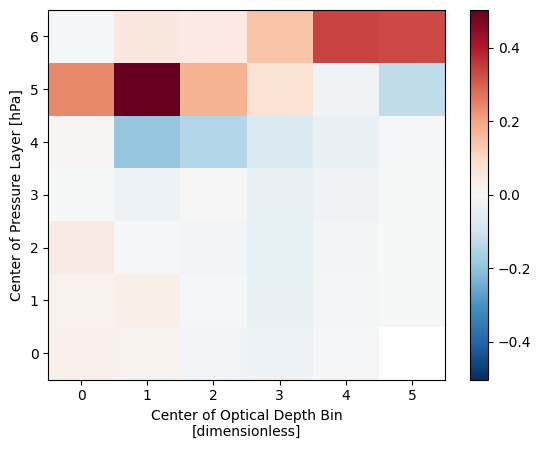

In [141]:
print(lwfeed_itcz.sum(["press", "opt"]).data)
print("High cloud ITCZ SW feedback = ", lwfeed_itcz.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud ITCZ SW feedback = ", lwfeed_itcz.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(lwfeed_itcz).plot() #vmin=-0.2, vmax=0.2, cmap="RdBu_r"

In [142]:
sw_feed_itcz =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = swR_itcz_mean.sel(press=p, opt=od)
        sw_regress = stats.linregress(gmst_anom_raghu, bints).slope
        sw_feed_itcz[p, od] = sw_regress

swfeed_itcz = xa.DataArray(sw_feed_itcz, 
                    coords={"press": swR_itcz_mean.press, "opt":swR_itcz_mean.opt, 
                           },
                   )

0.42744078240299394
High cloud ITCZ SW feedback =  -1.319930870039883
Low-mid cloud ITCZ SW feedback =  1.7473716524428773


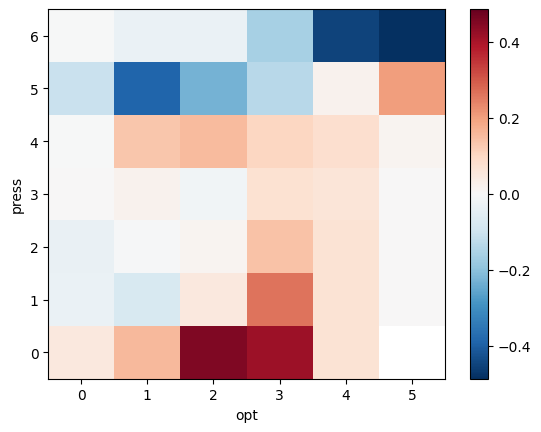

In [143]:
print(swfeed_itcz.sum(["press", "opt"]).data)
print("High cloud ITCZ SW feedback = ", swfeed_itcz.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud ITCZ SW feedback = ", swfeed_itcz.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(swfeed_itcz).plot() #vmin=-0.2, vmax=0.2, cmap="RdBu_r"

<xarray.DataArray ()>
array(1.58206054)
High cloud Tropical net feedback =  -0.031522252071014834
Low-mid cloud Tropical net feedback =  1.6135827913398926


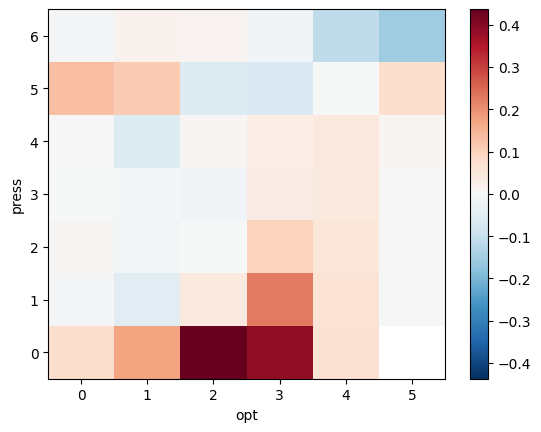

In [144]:
netfeed_itcz = swfeed_itcz + lwfeed_itcz
print(netfeed_itcz.sum(["press", "opt"]))
print("High cloud Tropical net feedback = ", netfeed_itcz.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical net feedback = ", netfeed_itcz.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
netfeed_itcz.plot() #vmin=-0.2, vmax=0.2, cmap="RdBu_r"

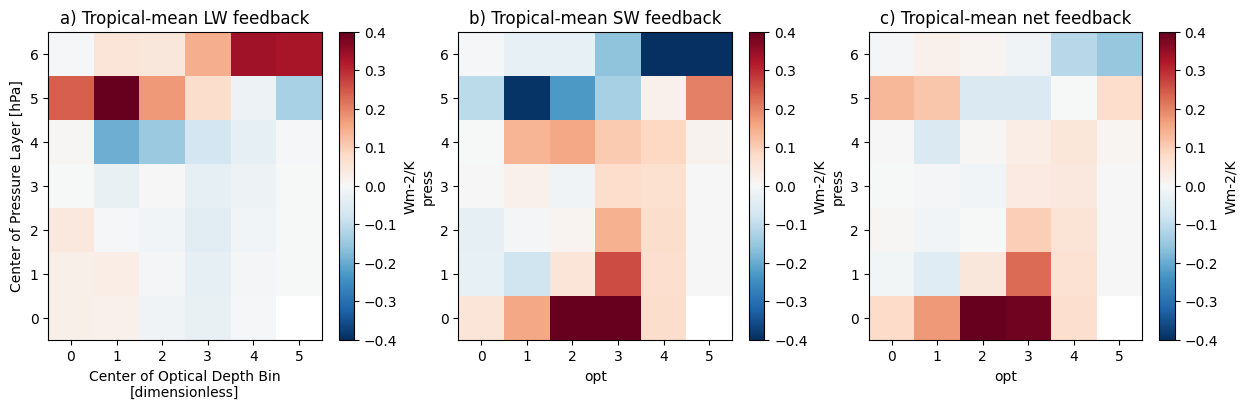

In [145]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwfeed_itcz.plot(cmap="RdBu_r", vmin=-0.4, vmax=0.4, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW feedback")
swfeed_itcz.plot(cmap="RdBu_r", vmin=-0.4, vmax=0.4, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW feedback")
netfeed_itcz.plot(cmap="RdBu_r", vmin=-0.4, vmax=0.4, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net feedback")
plt.savefig("feedbacks_itcz.png")